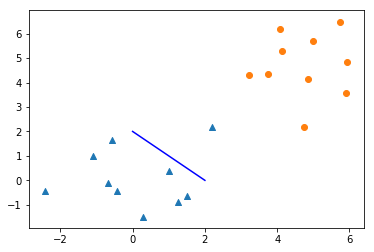

In [1]:
import numpy as np

rng = np.random.RandomState(123)

d = 2
N = 10
mean = 5

x1 = rng.randn(N, d) + np.array([0, 0])
x2 = rng.randn(N, d) + np.array([mean, mean]) 

# x = np.concatenate((x1, x2), axis = 0)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([0, 2], [2, 0],'b')
plt.scatter(x1[:, 0], x1[:, 1], marker='^')
plt.scatter(x2[:, 0], x2[:, 1], marker='o')
plt.show()

In [2]:
rng.randn(N, d)

array([[-0.80536652, -1.72766949],
       [-0.39089979,  0.57380586],
       [ 0.33858905, -0.01183049],
       [ 2.39236527,  0.41291216],
       [ 0.97873601,  2.23814334],
       [-1.29408532, -1.03878821],
       [ 1.74371223, -0.79806274],
       [ 0.02968323,  1.06931597],
       [ 0.89070639,  1.75488618],
       [ 1.49564414,  1.06939267]])

In [3]:
x[:,0]

NameError: name 'x' is not defined

In [10]:
x1

array([[-1.0856306 ,  0.99734545],
       [ 0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654],
       [-2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 ],
       [-0.67888615, -0.09470897],
       [ 1.49138963, -0.638902  ],
       [-0.44398196, -0.43435128],
       [ 2.20593008,  2.18678609],
       [ 1.0040539 ,  0.3861864 ]])

In [11]:
x1[0, 0], x1[0, 1]

(-1.0856306033005612, 0.99734544658358582)

In [12]:
- (x1[0,0]) + 2

3.0856306033005612

In [14]:
los = 0
for  elem in range(N):
    x = x1[elem, 0]
    y = x1[elem, 1]
    
    if (x + y - 2) > 0: 
        los +=1
    

In [15]:
los

1

In [17]:
los2 = 0

for  elem in range(N):
    x = x2[elem, 0]
    y = x2[elem, 1]
    
    if (x + y - 2) < 0: 
        los2 +=1


In [2]:
import tensorflow as tf

In [3]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

t = tf.placeholder(tf.float32)
a = tf.Variable([.9], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)

In [4]:
l = y - a*x -b

In [5]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [6]:
xarr = np.concatenate((x1, x2), axis = 0)

In [7]:
tarr = np.concatenate((-np.ones(N), np.ones(N)), axis=0)

In [8]:
sess.run([l], {x:[1], y:[3]})

[array([ 2.39999986], dtype=float32)]

In [51]:
#loss = tf.reduce_sum((-tf.sign(t*l)+1)/2)
#loss = tf.reduce_sum(tf.maximum(.0,-(t*l)))
loss =tf.reduce_sum(tf.maximum(.0,-(t*l)/tf.sqrt(1.0 + a**2)))

In [60]:
sess.run([loss], {x: xarr[:,0], y:xarr[:,1], t:tarr})

[8.7757893]

In [61]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [75]:
sess.run([train_step, loss, a, b], {x: xarr[:,0], y:xarr[:,1], t:tarr})

[None,
 0.0,
 array([-1.20776618], dtype=float32),
 array([ 4.86923361], dtype=float32)]

In [82]:
aaa  = sess.run([a, b])
aaa

[array([-1.20776618], dtype=float32), array([ 4.86923361], dtype=float32)]

In [84]:
aaa[0][0]

-1.2077662

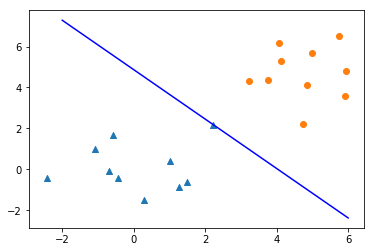

In [85]:
show_img(aaa[0][0], aaa[1][0])

In [78]:
def show_img(a,b):
    line_x = np.linspace(-2,6)
    line_y = a*line_x + b
    plt.plot(line_x, line_y,'b')
    plt.scatter(x1[:, 0], x1[:, 1], marker='^')
    plt.scatter(x2[:, 0], x2[:, 1], marker='o')
    plt.show()

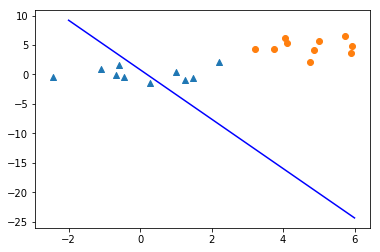

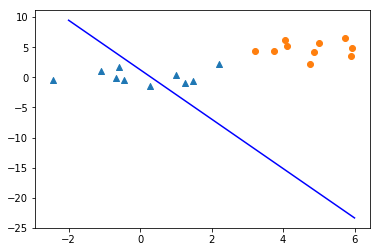

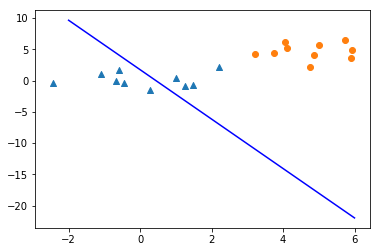

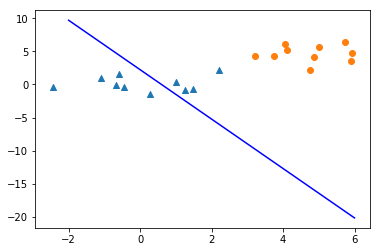

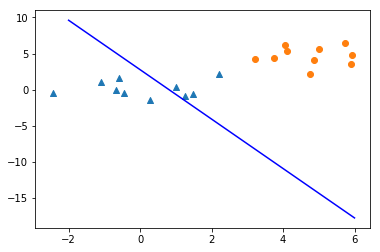

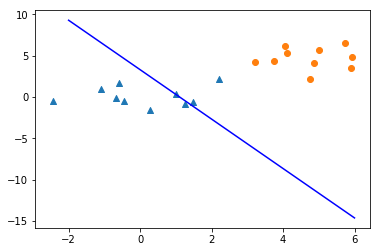

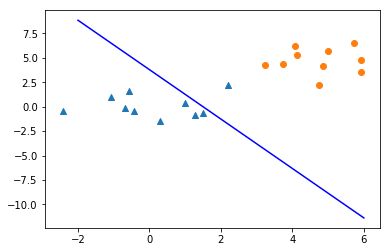

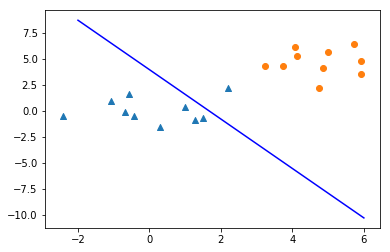

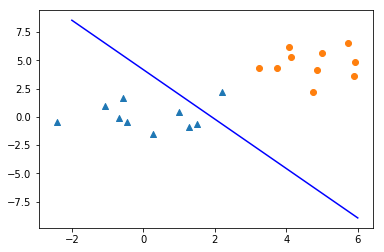

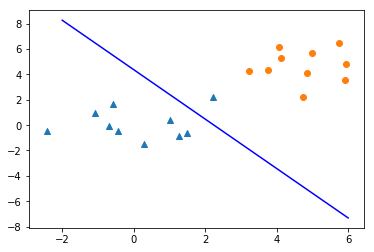

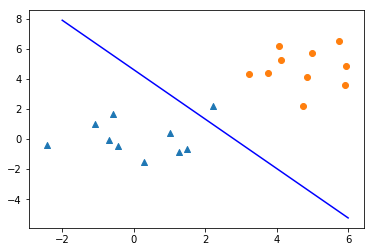

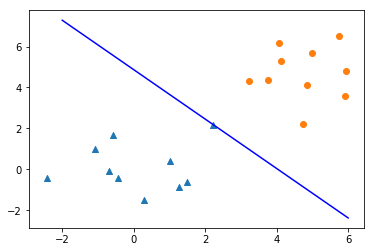

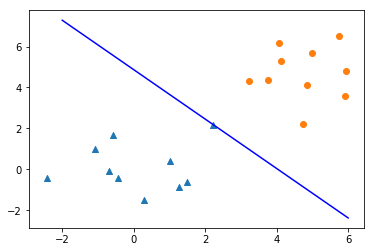

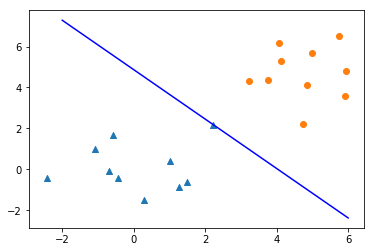

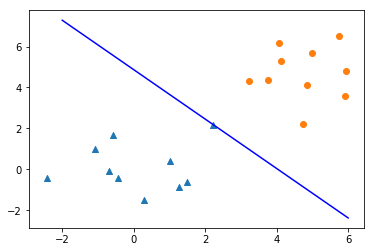

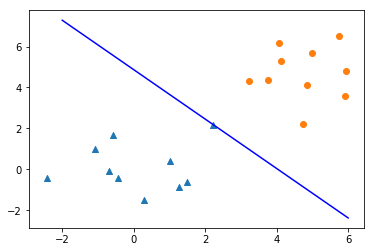

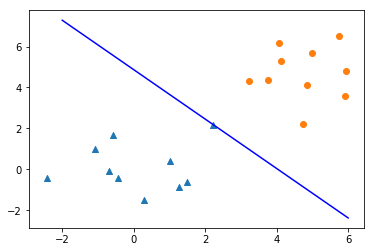

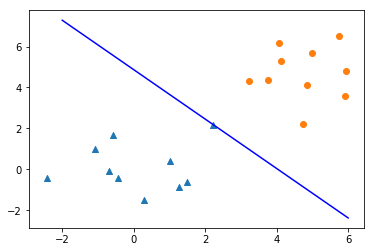

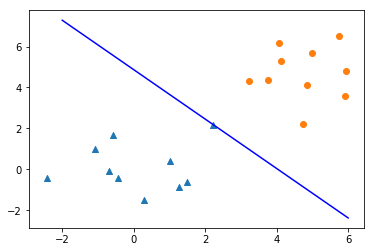

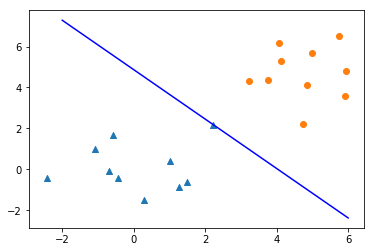

In [87]:
for _ in range(20):
    sess.run(train_step, feed_dict={x: xarr[:, 0], y: xarr[:, 1], t: tarr})
    a_value = sess.run(a)[0]
    b_value = sess.run(b)[0]
    show_img(a_value, b_value)